In [2]:
	# Дано два спектрально ограниченных гауссовских импульса одинаковой длительности 
    # с t_0=200 фс, один из них задержан относительно другого на 2 пс. Построить спектр
    #  получившейся временной функции. Теперь пускай в описанной выше ситуации один из 
    # импульсов обладает пиковой мощностью 800 кВт, а второй 8 кВт. Данные импульсы 
    # проходят следующую оптическую систему: среда, обладающая только дисперсией 8 пс2 
    # и не обладающая нелинейностью, среда длиной 1 м с нелинейностью γ=5 Вт/км и без 
    # дисперсии, и, наконец, среда, обладающая только дисперсией -8 пс2 и не обладающая
    #  нелинейностью. Найти форму импульса после прохождения описанной конфигурации.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

1 10 1


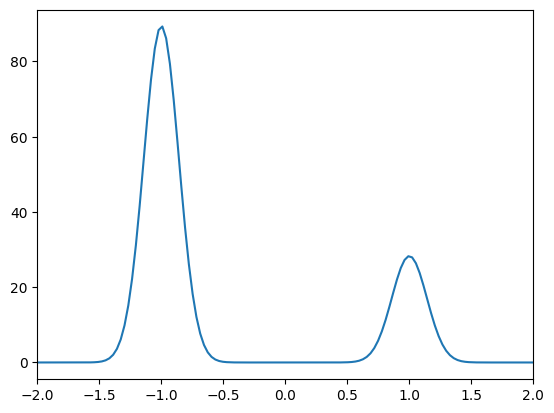

In [4]:
t0 = 200e-15     #c
delta_t = 2e-12  #c
P1 = 800      #Wt
P2 = 8e3        #Wt
# P2 = P1
beta2_1 = 12e-24   #c^2
beta2_2 = -12e-24  #c^2
l = 1             #m
l1 = l
l2 = 10
l3 = l
gamma = 5e-3     #Wt/m

T = 500*delta_t
N = 2**15
t = np.linspace(-T/2, T/2, N)

# Форма импульса - сумма двух гауссианов
A = np.sqrt(P1)*np.exp(-(t - delta_t/2 )**2 / t0**2) +  np.sqrt(P2)*np.exp(-(t + delta_t/2 )**2 / t0**2)

plt.plot(t*1e12, A)
plt.xlim(-2, 2)
print(l1, l2, l3)


In [5]:
def SPM(A, gamma, z):
    """Фазовая самомодуляция (временное представление)
    \nA * np.exp(1j * gamma * np.absolute(A)**2 * z)
    """
    return A * np.exp(1j * gamma * np.absolute(A)**2 * z)

def GVD(Aw, beta2, w, z):
    """Дисперсия групповых скоростей (спектральное представление)
    \nAw * np.exp(1j * beta2 * w**2 * z/2)
    """
    return Aw * np.exp(1j * beta2 * w**2 * z/2)

In [6]:
dt = t[1] - t[0]
f = np.fft.fftfreq(N, dt)
w = f * 2 * np.pi

# part1
# Только дисперсия 
Aw = np.fft.fft(A)
Aw1 = GVD(Aw, beta2_1, w, l1)
A1 = np.fft.ifft(Aw1)
# part2
# Только нелинейность (ФСМ)
A2 = SPM(A1, gamma, l2)
# part3
# Только дисперсия
Aw2 = np.fft.fft(A2)
Aw3 = GVD(Aw2, beta2_2, w, l3)
A3 = np.fft.ifft(Aw3)


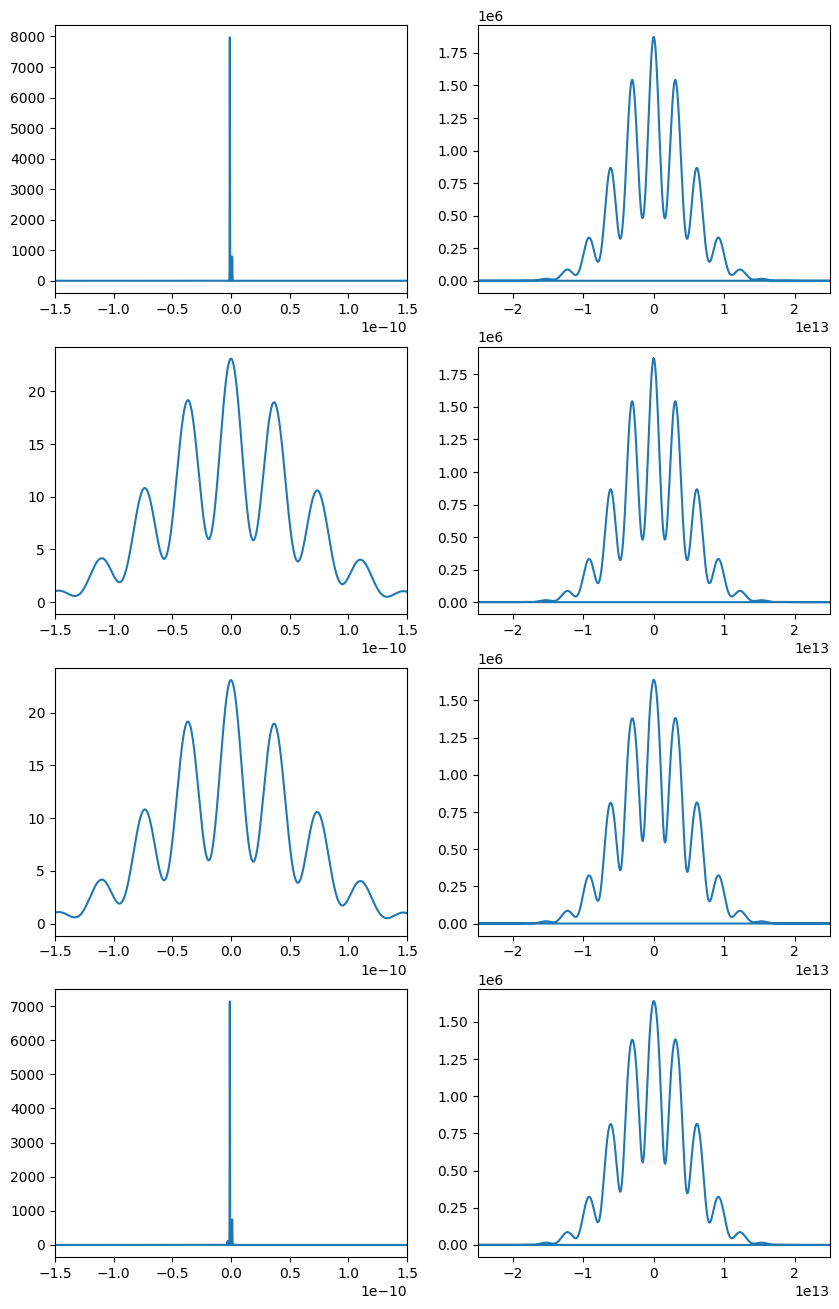

In [7]:
fig, axs = plt.subplots(4, 2)
fig.set_figwidth(10)
fig.set_figheight(16)

axs[0, 0].plot(t, np.absolute(A)**2)
axs[0, 1].plot(w, np.absolute(Aw)**2)
axs[1, 0].plot(t, np.absolute(A1)**2)
axs[1, 1].plot(w, np.absolute(Aw1)**2)
axs[2, 0].plot(t, np.absolute(A2)**2)
axs[2, 1].plot(w, np.absolute(Aw2)**2)
axs[3, 0].plot(t, np.absolute(A3)**2)
axs[3, 1].plot(w, np.absolute(Aw3)**2)


# axs[0, 0].plot(t, np.real(A)**2)
# axs[0, 1].plot(w, np.real(Aw)**2)
# axs[1, 0].plot(t, np.real(A1)**2)
# axs[1, 1].plot(w, np.real(Aw1)**2)
# axs[2, 0].plot(t, np.real(A2)**2)
# axs[2, 1].plot(w, np.real(Aw2)**2)
# axs[3, 0].plot(t, np.real(A3)**2)
# axs[3, 1].plot(w, np.real(Aw3)**2)

# axs[0, 0].plot(t, np.imag(A)**2)
# axs[0, 1].plot(w, np.imag(Aw)**2)
# axs[1, 0].plot(t, np.imag(A1)**2)
# axs[1, 1].plot(w, np.imag(Aw1)**2)
# axs[2, 0].plot(t, np.imag(A2)**2)
# axs[2, 1].plot(w, np.imag(Aw2)**2)
# axs[3, 0].plot(t, np.imag(A3)**2)
# axs[3, 1].plot(w, np.imag(Aw3)**2)

# axs[0, 0].set_xlim(-1e-11, 1e-11 )
# axs[0, 1].set_xlim(-0.25e14, 0.25e14 )
for i in range(0, 4):
    axs[i, 0].set_xlim(-1.5e-10, 1.5e-10 )
    axs[i, 1].set_xlim(-0.25e14, 0.25e14 )



(-5e-12, 2e-12)

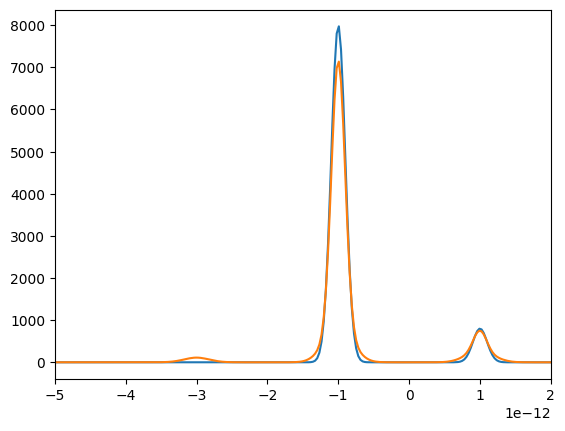

In [8]:
# Изменение формы импульса после прохождения системы
plt.plot(t, (np.absolute(A)**2))
plt.plot(t, (np.absolute(A3)**2))
plt.xlim(-5e-12, 2e-12)



-1.1987975951903808e-23 7262.065987833383


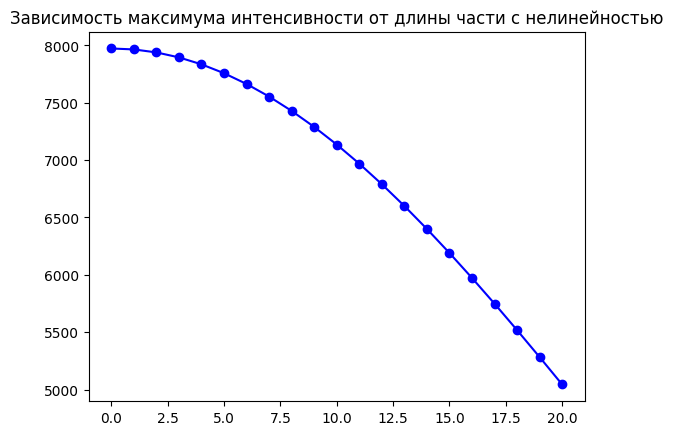

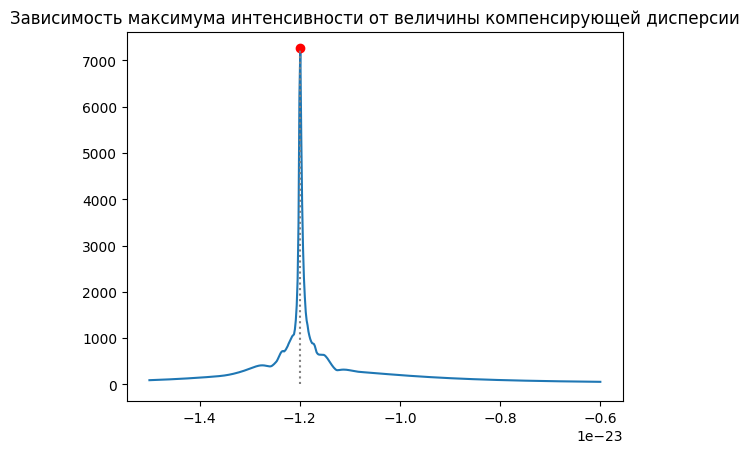

In [15]:
def calc(A, t, l1, l2, l3, beta2_1, gamma, beta2_2):
    """Возвращает интенсивность излучения после прохождения системы
    """
    dt = t[1] - t[0]
    f = np.fft.fftfreq(N, dt)
    w = f * 2 * np.pi

    #part1
    Aw = np.fft.fft(A)
    Aw1 = GVD(Aw, beta2_1, w, l1)
    A1 = np.fft.ifft(Aw1)
    #part2
    A2 = SPM(A1, gamma, l2)
    #part3
    Aw2 = np.fft.fft(A2)
    Aw3 = GVD(Aw2, beta2_2, w, l3)
    A3 = np.fft.ifft(Aw3)

    return np.absolute(A3)**2

fig, ax = plt.subplots()
ls = range(0, 21, 1)
maxs_l = [max(calc(A, t, l1, ll, l3, beta2_1, gamma, beta2_2)) for ll in ls]
plt.plot(ls, maxs_l ,'bo-')
plt.title("Зависимость максимума интенсивности от длины части с нелинейностью")

fig, ax = plt.subplots()
beta2_2s = np.linspace(-15e-24,  -6e-24, 500)
maxs_beta2_2 = [max(calc(A, t, l1, l2, l3, beta2_1, gamma, _beta2_2)) for _beta2_2 in beta2_2s]
plt.plot(beta2_2s, maxs_beta2_2)
plt.title("Зависимость максимума интенсивности от величины компенсирующей дисперсии")

idx_max = maxs_beta2_2.index(max(maxs_beta2_2))
plt.plot(beta2_2s[idx_max], maxs_beta2_2[idx_max], 'ro')
plt.plot([-beta2_1, -beta2_1], [0, maxs_beta2_2[idx_max]], ':', color = 'gray')
print(beta2_2s[idx_max], maxs_beta2_2[idx_max])

C:\Users\vika\AppData\Local\Temp\ipykernel_17124\999861101.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, np.log(np.absolute(A)**2), label = 'before')


(-20.0, 10.0)

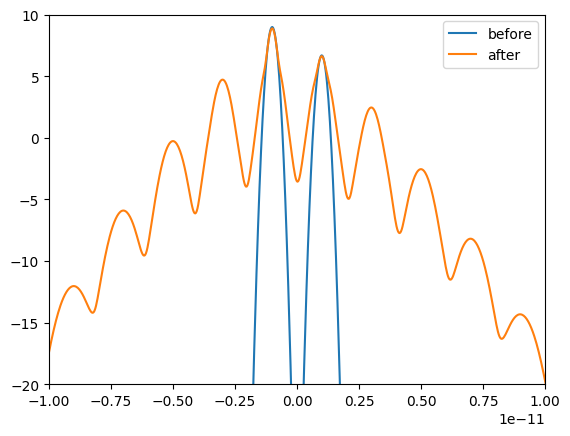

In [25]:
# Изменение интенсивности в логарифмическом масштабе
plt.plot(t, np.log(np.absolute(A)**2), label = 'before')
plt.plot(t, np.log(np.absolute(A3)**2), label = 'after')
plt.legend()
plt.xlim(-10e-12, 10e-12)
plt.ylim(-20, 10)

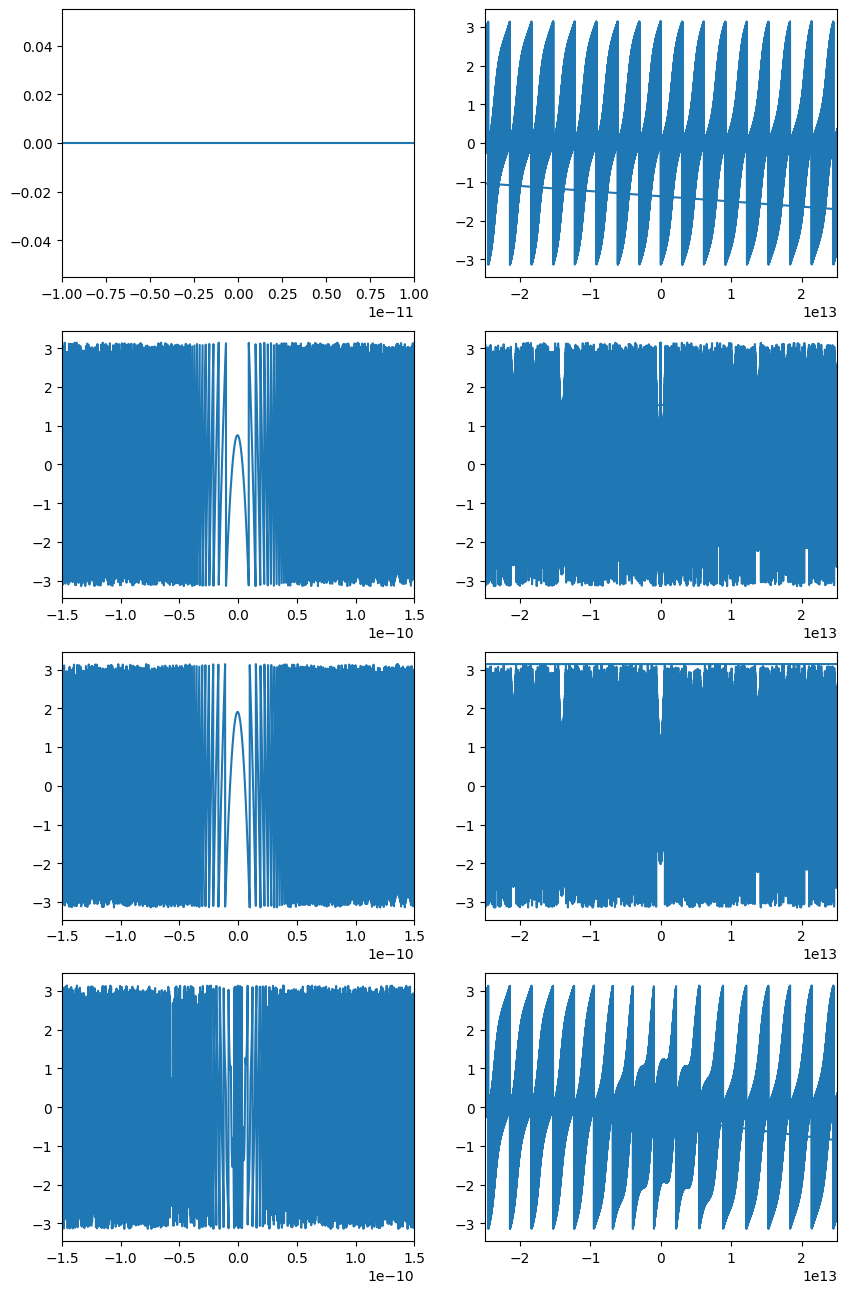

In [11]:
# Зависимость аргумента комплексной аплитуды 
fig, axs = plt.subplots(4, 2)
fig.set_figwidth(10)
fig.set_figheight(16)


axs[0, 0].plot(t, np.angle(A))
axs[0, 1].plot(w, np.angle(Aw))
axs[1, 0].plot(t, np.angle(A1))
axs[1, 1].plot(w, np.angle(Aw1))
axs[2, 0].plot(t, np.angle(A2))
axs[2, 1].plot(w, np.angle(Aw2))
axs[3, 0].plot(t, np.angle(A3))
axs[3, 1].plot(w, np.angle(Aw3))

axs[0, 0].set_xlim(-1e-11, 1e-11 )
axs[0, 1].set_xlim(-0.25e14, 0.25e14 )
for i in range(1, 4):
    axs[i, 0].set_xlim(-1.5e-10, 1.5e-10 )
    axs[i, 1].set_xlim(-0.25e14, 0.25e14 )

2e-13


c:\Users\vika\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


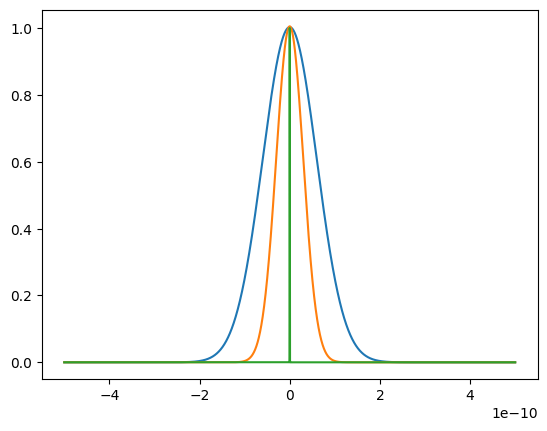

In [29]:
# уширение гауссового импульса в результате ДГС 
# Формула совпадает с уширением гауссового пучка
def AA(t, z, t0, beta2):
    return t0/np.sqrt(t0**2 - 1j*beta2*z)*np.exp(-t**2/(2 * (t0**2 -1j * beta2*z)))

a = AA(t, l, t0, beta2_1)
b = AA(t, l/2, t0, beta2_1)
c = AA(t, 0, t0, beta2_1)
plt.plot(t, np.absolute(a)/max(a)) 
plt.plot(t, np.absolute(b)/max(b)) 
plt.plot(t, np.absolute(c)/max(c)) 
print(t0)